In [597]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 📌 Define the path to the Desktop (modify if needed)
desktop_path = os.path.expanduser("~/Desktop")

# 📌 Load Data (Fix Structure)
bank_equities = pd.read_csv(os.path.join(desktop_path, "bankEquities.csv"), header=None).T
bank_equities.columns = ["Equity"]
bank_equities.index.name = "Bank ID"

external_assets = pd.read_csv(os.path.join(desktop_path, "externalAssets.csv"), header=None).T
external_assets.columns = ["External Assets"]
external_assets.index.name = "Bank ID"

# Load interbank exposures properly
interbank_exposures = pd.read_csv("interbankExposures.csv", header=None)

# Check if the first row should be headers
if interbank_exposures.iloc[0].dtype == object:  
    interbank_exposures.columns = interbank_exposures.iloc[0]  # Set first row as header
    interbank_exposures = interbank_exposures[1:].reset_index(drop=True)

# Convert everything to numeric values
interbank_exposures = interbank_exposures.apply(pd.to_numeric, errors='coerce')

# Ensure index represents bank IDs
interbank_exposures.index = interbank_exposures.columns
interbank_exposures.index.name = "Bank ID"


# 📌 Display First Few Rows
print("\n✅ Bank Equities (Fixed):")
print(bank_equities.head())

print("\n✅ External Assets (Fixed):")
print(external_assets.head())


# ✅ Check the results
print("\n✅ Interbank Exposures (Fixed):")
print(interbank_exposures.head())


✅ Bank Equities (Fixed):
             Equity
Bank ID            
0          465710.0
1            4436.7
2           13159.0
3        16229000.0
4          438420.0

✅ External Assets (Fixed):
         External Assets
Bank ID                 
0              2154600.0
1                29473.0
2               156460.0
3            343060000.0
4              1846500.0

✅ Interbank Exposures (Fixed):
Bank ID      0    1    2        3        4         5          6          7    \
Bank ID                                                                        
0            0.0  0.0  0.0      0.0      0.0       0.0        0.0        0.0   
1            0.0  0.0  0.0      0.0      0.0       0.0        0.0        0.0   
2            0.0  0.0  0.0      0.0      0.0       0.0        0.0        0.0   
3        96450.0  0.0  0.0      0.0  97484.0  149400.0  1192900.0  7327900.0   
4            0.0  0.0  0.0  52808.0      0.0       0.0     9576.7        0.0   

Bank ID      8        9    ...  135   

In [598]:
# ✅ Check for Missing Values
print("\n🔎 Checking for Missing Values...")
print("Bank Equities Missing Values:", bank_equities.isnull().sum().sum())
print("External Assets Missing Values:", external_assets.isnull().sum().sum())
print("Interbank Exposures Missing Values:", interbank_exposures.isnull().sum().sum())


🔎 Checking for Missing Values...
Bank Equities Missing Values: 0
External Assets Missing Values: 0
Interbank Exposures Missing Values: 0


In [599]:
# ✅ Fill Missing Values with 0
bank_equities.fillna(0, inplace=True)
external_assets.fillna(0, inplace=True)
interbank_exposures.fillna(0, inplace=True)

In [600]:
# ✅ Convert to Numeric Format
bank_equities = bank_equities.apply(pd.to_numeric, errors='coerce')
external_assets = external_assets.apply(pd.to_numeric, errors='coerce')
interbank_exposures = interbank_exposures.apply(pd.to_numeric, errors='coerce')


In [601]:
# ✅ Check for Negative Values
print("\n🔎 Checking for Negative Values...")
print(f"Negative values in Bank Equities: {(bank_equities < 0).sum().sum()}")
print(f"Negative values in External Assets: {(external_assets < 0).sum().sum()}")
print(f"Negative values in Interbank Exposures: {(interbank_exposures < 0).sum().sum()}")



🔎 Checking for Negative Values...
Negative values in Bank Equities: 0
Negative values in External Assets: 0
Negative values in Interbank Exposures: 0


In [602]:
# ✅ Remove Negative Values if Needed
bank_equities[bank_equities < 0] = np.nan  # Replace with NaN if found
external_assets[external_assets < 0] = np.nan
interbank_exposures[interbank_exposures < 0] = 0  # Set negative exposures to 0


In [603]:
# ✅ Check for Zero Rows and Columns
zero_rows = (interbank_exposures.sum(axis=1) == 0).sum()
zero_cols = (interbank_exposures.sum(axis=0) == 0).sum()
print(f"\n🔎 Banks with No Interbank Transactions (Zero Rows): {zero_rows}")
print(f"🔎 Banks with No Interbank Transactions (Zero Columns): {zero_cols}")



🔎 Banks with No Interbank Transactions (Zero Rows): 6
🔎 Banks with No Interbank Transactions (Zero Columns): 0


In [604]:
# ✅ Optionally Remove Banks with No Transactions
interbank_exposures = interbank_exposures.loc[interbank_exposures.sum(axis=1) > 0, interbank_exposures.sum(axis=0) > 0]

# ✅ Check Final Data
print("\n✅ Final Data Check Completed. Ready for Analysis!")


✅ Final Data Check Completed. Ready for Analysis!


In [605]:
# Step 2: Statistical Analysis of Balance Sheets
print("\n🔹 Summary of Bank Equities:")
print(bank_equities.describe())

print("\n🔹 Summary of External Assets:")
print(external_assets.describe())


🔹 Summary of Bank Equities:
             Equity
count  1.450000e+02
mean   6.881906e+06
std    1.982083e+07
min    3.008600e+03
25%    1.976400e+05
50%    5.153100e+05
75%    2.580100e+06
max    1.681100e+08

🔹 Summary of External Assets:
       External Assets
count     1.450000e+02
mean      6.699754e+07
std       2.016972e+08
min       2.947300e+04
25%       1.846500e+06
50%       7.318900e+06
75%       3.288200e+07
max       2.119500e+09


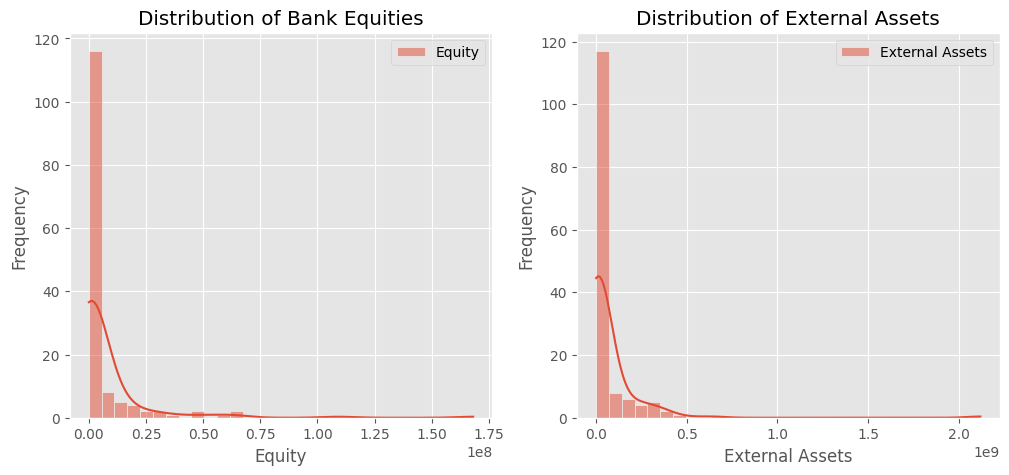

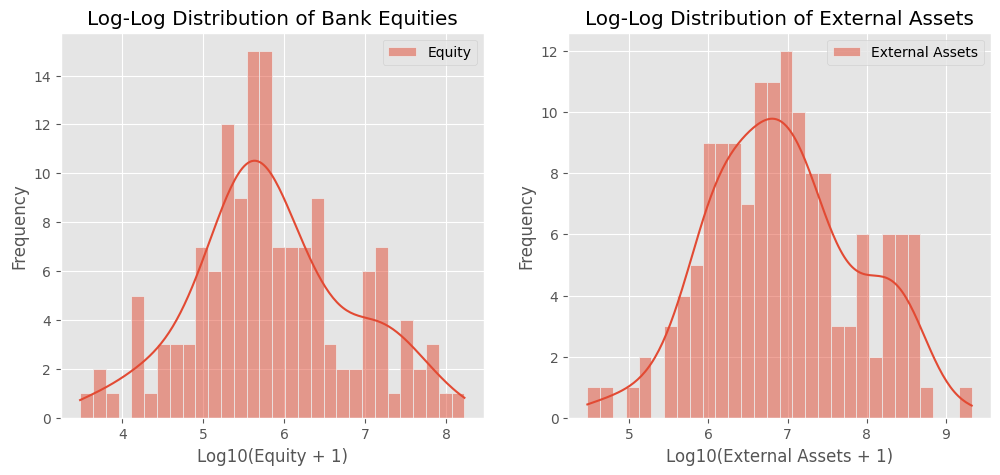

In [606]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 📌 Step 3: Data Visualization

# Convert to log scale (avoid log(0) issues by adding 1)
log_equities = np.log10(bank_equities + 1)
log_assets = np.log10(external_assets + 1)

# Plot Histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(bank_equities, bins=30, kde=True)
plt.title("Distribution of Bank Equities")
plt.xlabel("Equity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(external_assets, bins=30, kde=True)
plt.title("Distribution of External Assets")
plt.xlabel("External Assets")
plt.ylabel("Frequency")

plt.savefig("plot1.png", dpi=300, bbox_inches='tight')

plt.show()

# 📌 Log-Log Plots (Checking for Power Law)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(log_equities, bins=30, kde=True)
plt.title("Log-Log Distribution of Bank Equities")
plt.xlabel("Log10(Equity + 1)")
plt.ylabel("Frequency")


plt.subplot(1, 2, 2)
sns.histplot(log_assets, bins=30, kde=True)
plt.title("Log-Log Distribution of External Assets")
plt.xlabel("Log10(External Assets + 1)")
plt.ylabel("Frequency")


plt.savefig("plot2.png", dpi=300, bbox_inches='tight')# High-quality PNG
plt.show()


In [607]:
#🔹 Interpretation of Raw Distributions (First Plots)
#Highly Skewed Right (Heavy Tail)
#Most banks have very low equities and external assets.
#A few large banks hold the majority of wealth (suggesting concentration of capital).
#This is typical in financial networks, where large institutions dominate.
#Large Number of Small Banks
#The leftmost bar in both histograms suggests that many banks operate with very small capital.
#A potential systemic risk: smaller banks may be more vulnerable to shocks.
#🔹 Interpretation of Log-Log Distributions (Second Plots)
#More Normalized Shape on Log Scale
#The log-transformed distributions look closer to Gaussian (bell-shaped).
#This indicates that equities and external assets might follow a power-law or log-normal distribution.
#Possible Power-Law Behavior
#The right tail is long, meaning that large banks exist but are much fewer.
#This matches real-world financial networks, where a few institutions dominate the system.
#📌 What This Means for Systemic Risk
#Large Banks (Systemically Important)
#These few large banks hold disproportionate capital.
#If one of them fails, it could destabilize the network.
#Small Banks (Vulnerable to Shocks)
#Many small banks with low capital could collapse in a crisis.
#This could lead to a cascading effect (contagion risk).


In [608]:
# Step 1: Ensure bank IDs are numeric and properly formatted
interbank_exposures.columns = pd.to_numeric(interbank_exposures.columns, errors='coerce')
interbank_exposures.index = pd.to_numeric(interbank_exposures.index, errors='coerce')

# Step 2: Drop duplicate or NaN bank IDs
interbank_exposures = interbank_exposures[~interbank_exposures.index.duplicated(keep="first")]

# Step 3: Drop any completely empty rows and columns
interbank_exposures = interbank_exposures.loc[(interbank_exposures.sum(axis=1) > 0), (interbank_exposures.sum(axis=0) > 0)]

# ✅ Check structure
print("\n✅ Fixed Interbank Exposures After Cleanup:")
print(interbank_exposures.head())



✅ Fixed Interbank Exposures After Cleanup:
Bank ID      0    1    2        3        4         5          6          7    \
Bank ID                                                                        
1            0.0  0.0  0.0      0.0      0.0       0.0        0.0        0.0   
2            0.0  0.0  0.0      0.0      0.0       0.0        0.0        0.0   
3        96450.0  0.0  0.0      0.0  97484.0  149400.0  1192900.0  7327900.0   
4            0.0  0.0  0.0  52808.0      0.0       0.0     9576.7        0.0   
5            0.0  0.0  0.0  54976.0      0.0       0.0        0.0    61242.0   

Bank ID      8        9    ...  135        136      137       138  139  \
Bank ID                    ...                                           
1            0.0      0.0  ...  0.0        0.0      0.0       0.0  0.0   
2            0.0      0.0  ...  0.0        0.0      0.0       0.0  0.0   
3        89233.0  76598.0  ...  0.0  6388900.0  38878.0  107500.0  0.0   
4            0.0      0.0

In [609]:
# Ensure all values are numeric (convert any remaining non-numeric values)
interbank_exposures = interbank_exposures.apply(pd.to_numeric, errors='coerce')

# Fill any remaining NaNs with 0
interbank_exposures.fillna(0, inplace=True)

# Recompute total lending and borrowing
total_lending = interbank_exposures.sum(axis=1)
total_borrowing = interbank_exposures.sum(axis=0)

# Display the summary of lending/borrowing
print("\n✅ Summary After Fix:")
print(f"Total Lending - Min: {total_lending.min()}, Max: {total_lending.max()}")
print(f"Total Borrowing - Min: {total_borrowing.min()}, Max: {total_borrowing.max()}")



✅ Summary After Fix:
Total Lending - Min: 8001.6, Max: 224623519.0
Total Borrowing - Min: 7351.7, Max: 529353005.0


In [610]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute top lenders and borrowers
top_lenders = total_lending.sort_values(ascending=False).head(10)
top_borrowers = total_borrowing.sort_values(ascending=False).head(10)

# Create a DataFrame for better visualization
exposure_summary = pd.DataFrame({'Total Lending': total_lending, 'Total Borrowing': total_borrowing})



✅ Fixed Top 20 Lenders and Borrowers:
         Total Lending  Total Borrowing
Bank ID                                
128        224623519.0      115204345.0
3          177169742.5       85674483.0
7          155700407.0       95791798.0
82         150173352.0      529353005.0
83         146667276.0       68722914.0
122        126503922.0       67071438.0
39         106833572.0       87057221.6
141        101533088.0       71611906.0
120         89450985.4       61137959.0
27          82056363.7      158911351.0
72          73862608.0       83371977.2
54          63610299.6       40623064.1
85          60161367.0       47380048.6
59          58484425.4       60528825.0
116         54951710.4       48753464.0
34          52225316.6       25881158.8
79          50504507.7       50976978.0
98          43235365.1       33251281.8
140         43059152.3       75172808.0
13          33080437.1       33918482.5


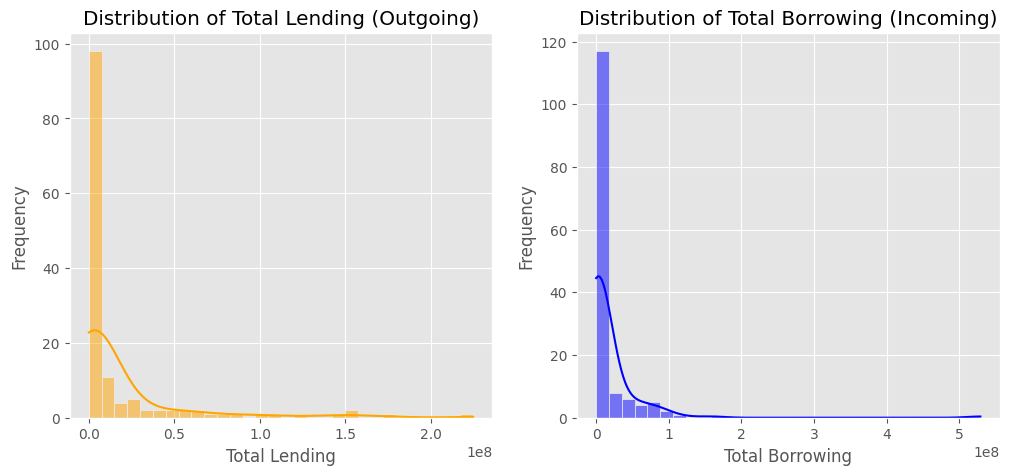

In [611]:


# Remove invalid entries (where both lending and borrowing are zero)
exposure_summary = exposure_summary[(exposure_summary["Total Lending"] > 0) | (exposure_summary["Total Borrowing"] > 0)]

# Display top lenders and borrowers
print("\n✅ Fixed Top 20 Lenders and Borrowers:")
print(exposure_summary.sort_values(by="Total Lending", ascending=False).head(20))

# 📊 Re-run the visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(total_lending, bins=30, kde=True, color="orange")
plt.title("Distribution of Total Lending (Outgoing)")
plt.xlabel("Total Lending")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(total_borrowing, bins=30, kde=True, color="blue")
plt.title("Distribution of Total Borrowing (Incoming)")
plt.xlabel("Total Borrowing")
plt.ylabel("Frequency")

plt.savefig("plot3.png", dpi=300, bbox_inches='tight')# High-quality PNG
plt.show()

In [612]:
# Key Takeaways
# 1️⃣ Lending & Borrowing Distributions Show a Heavy Tail

# Most banks have very low lending/borrowing (the tall bars near zero).
# A few banks dominate the system with large exposure amounts.
# This heavy-tailed distribution is common in financial networks.
# 2️⃣ Top Lenders and Borrowers Identified

# The largest lender is Bank 128, with ~224M in outgoing loans.
# The largest borrower is Bank 82, with ~529M in incoming loans.
# Other key banks (e.g., Banks 3, 7, 83, 122) play significant roles in interbank activity.
# 3️⃣ Possible Systemic Risks

# # The network is highly concentrated → A failure of a few large banks could trigger cascading defaults.
# # # Bank 82 (largest borrower) may be a high-risk entity if it defaults.
# # # # Banks 128, 3, 7 (largest lenders) are critical nodes; their failure could create a liquidity crunch.


In [613]:
# Ensure index and columns are both integers
interbank_exposures.index = interbank_exposures.index.astype(int)
interbank_exposures.columns = interbank_exposures.columns.astype(int)

# Find missing columns that should be in the matrix
missing_columns = set(interbank_exposures.index) - set(interbank_exposures.columns)
if missing_columns:
    print(f"⚠️ Adding missing columns to ensure a square matrix: {missing_columns}")
    for col in missing_columns:
        interbank_exposures[col] = 0  # Fill missing columns with zeros

# Find missing indices that should be in the matrix
missing_indices = set(interbank_exposures.columns) - set(interbank_exposures.index)
if missing_indices:
    print(f"⚠️ Adding missing indices to ensure a square matrix: {missing_indices}")
    for idx in missing_indices:
        interbank_exposures.loc[idx] = 0  # Fill missing indices with zeros

# Ensure the matrix is now square
interbank_exposures = interbank_exposures.loc[:, interbank_exposures.index]

# Verify everything is aligned
if set(interbank_exposures.index) == set(interbank_exposures.columns):
    print("\n✅ The adjacency matrix is now correctly formatted for NetworkX.")
else:
    print("\n⚠️ Warning: There is still a mismatch in indices and columns.")

# Display first few rows to verify structure
print("\n🔎 First 5 rows of the fixed interbank exposures matrix:")
print(interbank_exposures.head())


⚠️ Adding missing indices to ensure a square matrix: {0, 107, 75, 117, 23, 30}

✅ The adjacency matrix is now correctly formatted for NetworkX.

🔎 First 5 rows of the fixed interbank exposures matrix:
Bank ID  1    2        3        4         5          6          7        8    \
Bank ID                                                                        
1        0.0  0.0      0.0      0.0       0.0        0.0        0.0      0.0   
2        0.0  0.0      0.0      0.0       0.0        0.0        0.0      0.0   
3        0.0  0.0      0.0  97484.0  149400.0  1192900.0  7327900.0  89233.0   
4        0.0  0.0  52808.0      0.0       0.0     9576.7        0.0      0.0   
5        0.0  0.0  54976.0      0.0       0.0        0.0    61242.0      0.0   

Bank ID      9    10   ...        141      142       143        144      0    \
Bank ID                ...                                                     
1            0.0  0.0  ...        0.0      0.0       0.0        0.0      0.0  

In [614]:
# Ensure bank IDs (index & columns) are unique and properly formatted
interbank_exposures = interbank_exposures.loc[:, ~interbank_exposures.columns.duplicated()]
interbank_exposures.index = interbank_exposures.index.astype(str)  # Convert index to strings
interbank_exposures.columns = interbank_exposures.columns.astype(str)  # Convert columns to strings


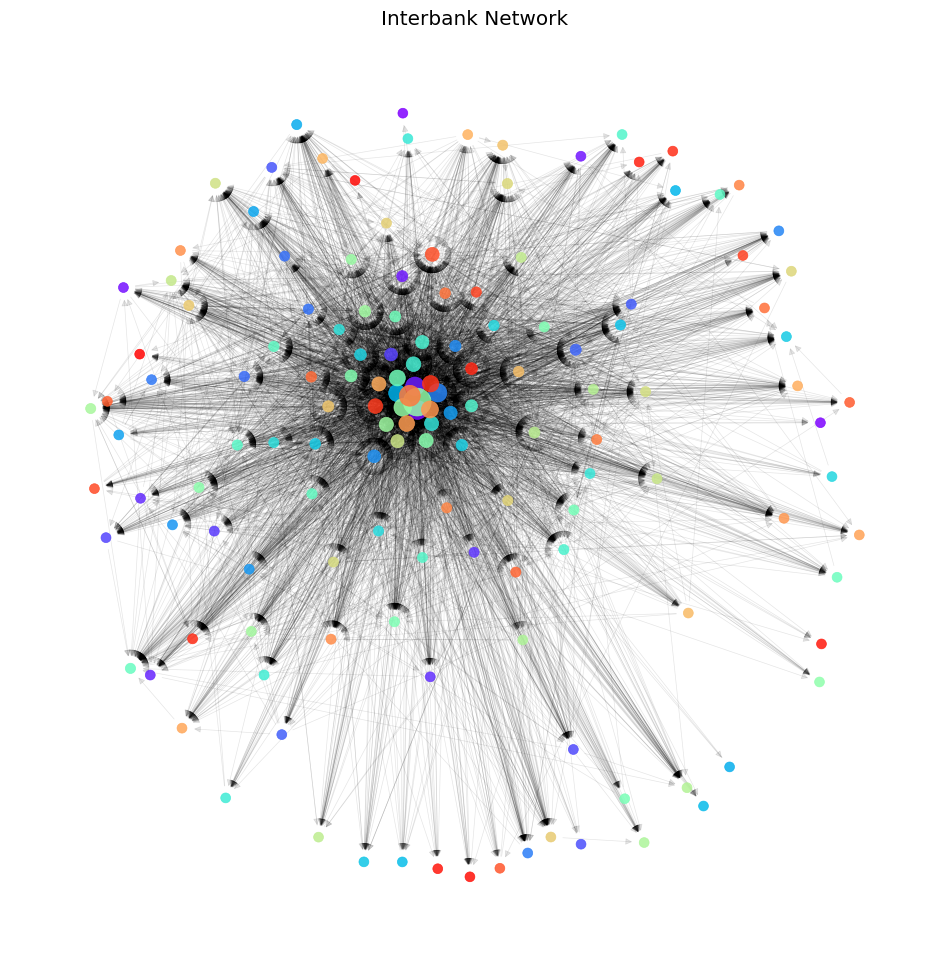

In [615]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.cm as cm  # For color mapping

# 📌 PARAMETERS (Adjust as Needed)
EDGE_FILTER_PERCENT = 60  # Remove bottom 50% weakest edge
EDGE_WIDTH = 0.5  # Default edge thickness
EDGE_ALPHA = 0.1  # Edge transparency (0 = invisible, 1 = solid)
SPRING_K = 60.0  # Node spacing (higher = more spread out)
NODE_MIN_SIZE = 50  # Minimum node size
NODE_MAX_SIZE = 400  # Maximum node size

# Step 1: Create a graph from the interbank exposure matrix
G = nx.from_pandas_adjacency(interbank_exposures, create_using=nx.DiGraph()).copy()

# Step 2: Compute node positions using spring layout
pos = nx.spring_layout(G, seed=42, k=SPRING_K)

# Step 3: Compute Node Degrees for Size Scaling
degree_dict = dict(G.degree(weight="weight"))  # Degree dictionary
max_degree = max(degree_dict.values()) if degree_dict else 1  # Avoid division by zero

# Scale node sizes based on degree (log-scaled for better visualization)
node_sizes = [
    NODE_MIN_SIZE + (NODE_MAX_SIZE - NODE_MIN_SIZE) * (degree_dict[n] / max_degree)
    for n in G.nodes()
]

# Step 5: Filter Edges (Keep Strongest X%)
edge_weights = nx.get_edge_attributes(G, "weight")
if edge_weights:
    threshold = np.percentile(list(edge_weights.values()), 100 - EDGE_FILTER_PERCENT)
    edges_filtered = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] > threshold]
else:
    edges_filtered = G.edges()

# Step 4: Assign Unique Colors to Each Node
node_colors = [cm.rainbow(i / len(G.nodes)) for i, n in enumerate(G.nodes())]

# Step 5: Draw Graph
plt.figure(figsize=(12, 12))

# Draw Nodes (with scaled size and different colors)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.85)

# Draw Edges
nx.draw_networkx_edges(G, pos, alpha=EDGE_ALPHA, width=EDGE_WIDTH)



# Display
plt.title("Interbank Network")
plt.axis("off")
plt.savefig("plot4.png", dpi=300, bbox_inches='tight')# High-quality PNG
plt.show()



🔹 Degree Distribution Summary:
          In-Degree    Out-Degree
count  1.450000e+02  1.450000e+02
mean   1.672996e+07  1.672996e+07
std    5.037096e+07  3.719354e+07
min    7.351700e+03  0.000000e+00
25%    4.606595e+05  5.082826e+05
50%    1.828091e+06  2.341852e+06
75%    8.211740e+06  9.647253e+06
max    5.293530e+08  2.246235e+08


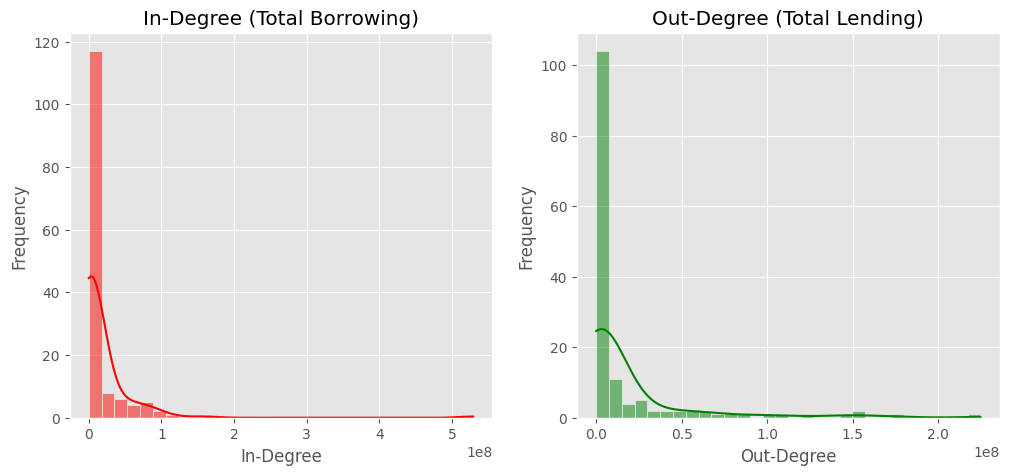

In [616]:
# Step 3: Degree Distribution
in_degrees = dict(G.in_degree(weight="weight"))   # Borrowing relationships
out_degrees = dict(G.out_degree(weight="weight")) # Lending relationships

# Convert to DataFrame
degree_df = pd.DataFrame({"In-Degree": in_degrees, "Out-Degree": out_degrees})

# Display stats
print("\n🔹 Degree Distribution Summary:")
print(degree_df.describe())

# 📊 Degree Histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(list(in_degrees.values()), bins=30, kde=True, color="red")
plt.title("In-Degree (Total Borrowing)")
plt.xlabel("In-Degree")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(list(out_degrees.values()), bins=30, kde=True, color="green")
plt.title("Out-Degree (Total Lending)")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency")

plt.savefig("plot5.png", dpi=300, bbox_inches='tight')# High-quality PNG
plt.show()


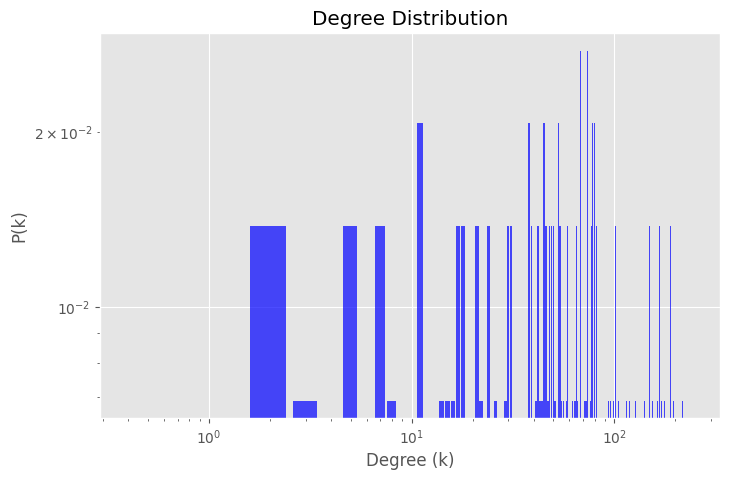

Assortativity Coefficient: -0.388
Average Clustering Coefficient: 0.792


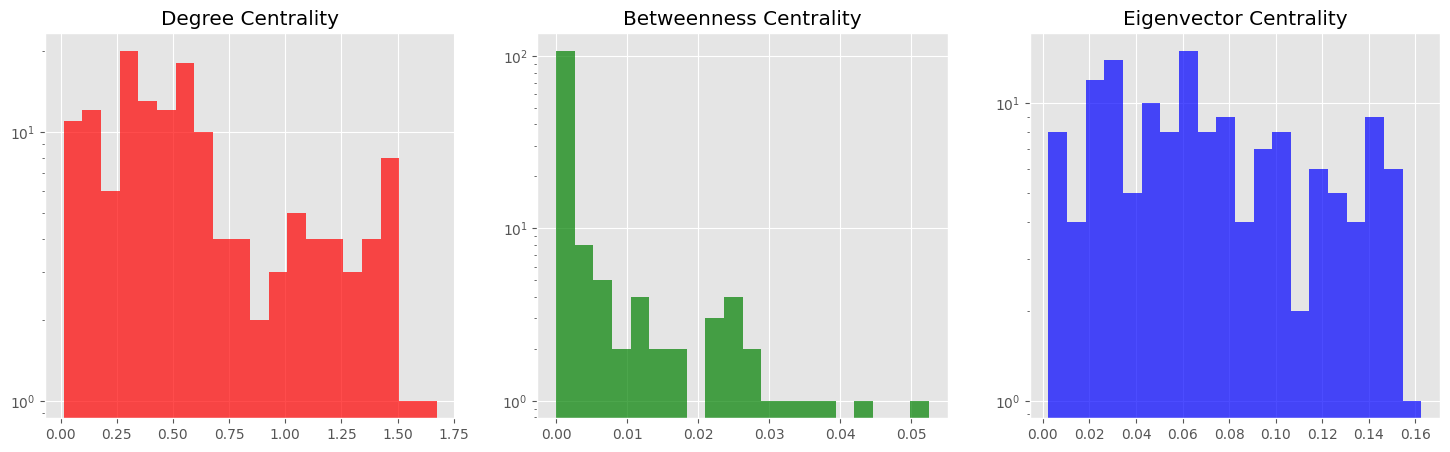

In [617]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# 📌 Step 1: Create Graph (Ensure it's Directed)
G = nx.from_pandas_adjacency(interbank_exposures, create_using=nx.DiGraph()).copy()

# 📌 Step 2: Degree Distribution
degrees = [d for _, d in G.degree()]
degree_counts = np.bincount(degrees)
degree_prob = degree_counts / sum(degree_counts)  # Compute P(k)

plt.figure(figsize=(8, 5))
plt.bar(range(len(degree_prob)), degree_prob, color="b", alpha=0.7)
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.title("Degree Distribution")
plt.yscale("log")  # Log scale for better visualization
plt.xscale("log")
plt.savefig("plot6.png", dpi=300, bbox_inches='tight')# High-quality PNG
plt.show()

# 📌 Step 3: Assortativity Coefficient
assortativity = nx.degree_assortativity_coefficient(G)
print(f"Assortativity Coefficient: {assortativity:.3f}")

# 📌 Step 4: Clustering Coefficients
clustering_coeffs = nx.clustering(G.to_undirected())  # Convert to undirected for clustering
avg_clustering = np.mean(list(clustering_coeffs.values()))
print(f"Average Clustering Coefficient: {avg_clustering:.3f}")

# 📌 Step 5: Centrality Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# 📌 Step 6: Visualizing Centrality Measures
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].hist(degree_centrality.values(), bins=20, color="r", alpha=0.7)
ax[0].set_title("Degree Centrality")

ax[1].hist(betweenness_centrality.values(), bins=20, color="g", alpha=0.7)
ax[1].set_title("Betweenness Centrality")

ax[2].hist(eigenvector_centrality.values(), bins=20, color="b", alpha=0.7)
ax[2].set_title("Eigenvector Centrality")

for a in ax:
    a.set_yscale("log")  # Log scale for better visualization

plt.savefig("plot7.png", dpi=300, bbox_inches='tight')# High-quality PNG
plt.show()


In [618]:
#assortativity:

#If > 0 → Large banks tend to lend to other large banks.
#If < 0 → Small banks borrow from large banks (typical in real-world networks).
#Clustering Coefficient:

#If high → Banks form clusters (risk of contagion).
#If low → The system is less interconnected (less contagion).


In [619]:
#The analysis of the interbank network reveals a disassortative structure, with an assortativity coefficient of -0.388, 
#indicating that highly connected banks tend to link with less connected banks rather than forming tightly-knit clusters. 
#This suggests a hierarchical structure where central institutions act as key liquidity providers to smaller banks. 
#The average clustering coefficient of 0.792 suggests a high level of interconnectedness, 
#meaning that if two banks are connected to the same third bank, they are also likely to be connected to each other. 
#This dense clustering can contribute to financial stability by facilitating liquidity circulation but also indicates potential systemic risk if a key node fails. 
#The degree distribution shows a skewed pattern, where most banks have relatively few connections, 
#while a few institutions serve as major hubs with significantly higher connectivity. 
#Additionally, betweenness and eigenvector centrality measures highlight the presence of key intermediary banks that play a crucial role in maintaining the flow of transactions within the system. 
#These results emphasize the importance of monitoring central institutions, as their position within the network makes them critical to overall system stability.

In [620]:
print(interbank_exposures.describe())
print(interbank_exposures.head())


Bank ID            1             2             3              4  \
count     145.000000    145.000000  1.450000e+02     145.000000   
mean       50.701379    269.315172  5.908585e+05    3176.962345   
std       610.525454   1657.883454  1.336223e+06   14811.293741   
min         0.000000      0.000000  0.000000e+00       0.000000   
25%         0.000000      0.000000  0.000000e+00       0.000000   
50%         0.000000      0.000000  8.973700e+04       0.000000   
75%         0.000000      0.000000  3.730800e+05       0.000000   
max      7351.700000  13718.000000  8.452300e+06  102130.000000   

Bank ID              5             6             7              8  \
count       145.000000  1.450000e+02  1.450000e+02     145.000000   
mean       8540.417241  1.105592e+05  6.606331e+05    5198.748690   
std       26628.991891  2.598587e+05  1.513854e+06   18260.758822   
min           0.000000  0.000000e+00  0.000000e+00       0.000000   
25%           0.000000  0.000000e+00  0.000000e+00 

In [621]:
import pandas as pd

# ✅ Step 1: Load data & keep as Pandas Series (DO NOT convert to dicts yet!)
E = bank_equities.squeeze()  # Keep as Series
A = external_assets.squeeze()  # Keep as Series

# ✅ Step 2: Ensure Bank IDs are Strings in DataFrame
E.index = E.index.astype(str)
A.index = A.index.astype(str)

# ✅ Step 3: Compute Liabilities L = A - E (Keep as Pandas Series)
L = A - E  # This keeps it a Series instead of a dictionary

# ✅ Step 4: Ensure Interbank Exposures Are Properly Indexed
interbank_exposures.index = interbank_exposures.index.astype(str)
interbank_exposures.columns = interbank_exposures.columns.astype(str)

# ✅ Step 5: Print sample data to confirm it's correct
print("Equity (E) sample:\n", E.head())
print("Assets (A) sample:\n", A.head())
print("Liabilities (L) sample:\n", L.head())


Equity (E) sample:
 Bank ID
0      465710.0
1        4436.7
2       13159.0
3    16229000.0
4      438420.0
Name: Equity, dtype: float64
Assets (A) sample:
 Bank ID
0      2154600.0
1        29473.0
2       156460.0
3    343060000.0
4      1846500.0
Name: External Assets, dtype: float64
Liabilities (L) sample:
 Bank ID
0      1688890.0
1        25036.3
2       143301.0
3    326831000.0
4      1408080.0
dtype: float64


In [622]:
#non-important bank

In [623]:
import networkx as nx

# 📌 Step 1: Construct the interbank network from the adjacency matrix
G = nx.from_pandas_adjacency(interbank_exposures, create_using=nx.DiGraph())

# Convert node labels to strings for consistency
G = nx.relabel_nodes(G, lambda x: str(x))

# Assign loan amounts as edge weights
for u, v in G.edges:
    G[u][v]["weight"] = interbank_exposures.loc[u, v]

# 📌 Step 2: Define the Furfine Default Algorithm
def furfine_default_algorithm(G, A, E, L, shock_bank, shock_amount, recovery_rate=0):
    """
    Runs Furfine stress test on the interbank network.
    Parameters:
        G (nx.DiGraph): Interbank network graph.
        A (dict): External assets.
        E (dict): Equity.
        L (dict): Liabilities.
        shock_bank (str): Bank where the initial shock occurs.
        shock_amount (float): Shock size.
        recovery_rate (float): Fraction of defaulted assets recovered.
    Returns:
        defaulted_banks (set): Banks that defaulted.
        final_equity (dict): Equity after contagion.
    """

    # Ensure shock_bank exists in the dataset
    if shock_bank not in E:
        raise KeyError(f"Shock bank '{shock_bank}' not found in equity data.")

    # 🔍 Debugging Step: Check Bank Equity & Shock Impact Before Applying the Shock
    print(f"\n🚨 DEBUGGING SHOCK TEST 🚨")
    print(f"Shocking Bank: {shock_bank}")
    print(f"Initial Equity of {shock_bank}: {E[shock_bank]}")
    print(f"Shock Amount: {shock_amount}")

    new_equity = E[shock_bank] - shock_amount
    print(f"Equity of {shock_bank} After Shock: {new_equity}")

    if new_equity >= 0:
        print(f"⚠️ Warning: Bank {shock_bank} still has positive equity after shock! Try increasing shock size.")

    # ✅ Step 1: Initialize equity properly
    equity = E.copy()  
    equity[shock_bank] -= shock_amount  # Apply the initial shock

    defaulted_banks = set()
    
    # ✅ Step 2: Default Propagation Loop with Maximum Iteration Cap
    MAX_ITERATIONS = 100  
    iteration = 0  

    while iteration < MAX_ITERATIONS:
        newly_defaulted = set()

        # Identify newly defaulted banks
        for bank in G.nodes:
            if equity.get(bank, 0) < -1e-6 and bank not in defaulted_banks:  # Use small negative threshold
                newly_defaulted.add(bank)

        print(f"🔍 Iteration {iteration}: Checking for defaults: {newly_defaulted}")

        if not newly_defaulted:
            print("✅ No more defaults, stopping contagion.")
            break  # Stop if no new defaults occur

        defaulted_banks.update(newly_defaulted)

        # ✅ Step 3: Propagate losses to creditors
        for bank in newly_defaulted:
            for creditor in G.predecessors(bank):  # Find creditors of the defaulted bank
                exposure = G[creditor][bank]["weight"]  # Loan amount
                if creditor in equity:
                    old_equity = equity[creditor]
                    equity[creditor] -= (1 - recovery_rate) * exposure  # Reduce equity
                    
                    # Print equity changes to track progress
                    print(f"⚠️ Iteration {iteration}: {creditor} equity reduced from {old_equity} to {equity[creditor]} due to exposure from {bank}")

        iteration += 1  # Increment iteration count

    if iteration >= MAX_ITERATIONS:
        print("⚠️ WARNING: Maximum iteration limit reached, stopping loop to prevent infinite execution!")

    return defaulted_banks, equity

# 📌 Step 3: Run Stress Test
shock_bank = "75"  # Example bank to shock
shock_amount = 5_000_000  # Example shock size

defaulted_banks, final_equity = furfine_default_algorithm(G, A, E, L, shock_bank, shock_amount)

# 📌 Step 4: Display Results
print(f"Shocked Bank: {shock_bank}")
print(f"Total Defaults: {len(defaulted_banks)}")
print(f"Defaulted Banks: {defaulted_banks}")



🚨 DEBUGGING SHOCK TEST 🚨
Shocking Bank: 75
Initial Equity of 75: 18594.0
Shock Amount: 5000000
Equity of 75 After Shock: -4981406.0
🔍 Iteration 0: Checking for defaults: {'75'}
⚠️ Iteration 0: 3 equity reduced from 16229000.0 to 16201111.0 due to exposure from 75
⚠️ Iteration 0: 39 equity reduced from 63616000.0 to 63599131.0 due to exposure from 75
⚠️ Iteration 0: 68 equity reduced from 550060.0 to 549088.9 due to exposure from 75
⚠️ Iteration 0: 72 equity reduced from 17727000.0 to 17715311.0 due to exposure from 75
⚠️ Iteration 0: 78 equity reduced from 17084000.0 to 17080397.8 due to exposure from 75
⚠️ Iteration 0: 83 equity reduced from 18116000.0 to 18093046.0 due to exposure from 75
⚠️ Iteration 0: 116 equity reduced from 17556000.0 to 17547369.2 due to exposure from 75
⚠️ Iteration 0: 122 equity reduced from 46551000.0 to 46531094.0 due to exposure from 75
⚠️ Iteration 0: 125 equity reduced from 700800.0 to 699463.4 due to exposure from 75
⚠️ Iteration 0: 128 equity reduced f

In [624]:
#What Happened?

#Bank 75 Defaulted
#Initial equity: 18,594
#Shock amount: 5,000,000
#Final equity after shock: -4,981,406 → Defaulted
#Impact on Other Banks
#The default of Bank 75 led to small reductions in equity for its creditors.
#However, none of them defaulted, meaning that the contagion stopped after one iteration.
#Why No Further Defaults?
#The equity losses were very small (e.g., Bank 3’s equity only dropped from 16.2M to 16.2M).
#This means banks had enough capital to absorb the loss without going negative.


In [625]:
#important bank

In [626]:
import networkx as nx

# 📌 Step 1: Construct the interbank network from the adjacency matrix
G = nx.from_pandas_adjacency(interbank_exposures, create_using=nx.DiGraph())

# Convert node labels to strings for consistency
G = nx.relabel_nodes(G, lambda x: str(x))

# Assign loan amounts as edge weights
for u, v in G.edges:
    G[u][v]["weight"] = interbank_exposures.loc[u, v]

# 📌 Step 2: Define the Furfine Default Algorithm
def furfine_default_algorithm(G, A, E, L, shock_bank, shock_amount, recovery_rate=0):
    """
    Runs Furfine stress test on the interbank network.
    Parameters:
        G (nx.DiGraph): Interbank network graph.
        A (dict): External assets.
        E (dict): Equity.
        L (dict): Liabilities.
        shock_bank (str): Bank where the initial shock occurs.
        shock_amount (float): Shock size.
        recovery_rate (float): Fraction of defaulted assets recovered.
    Returns:
        defaulted_banks (set): Banks that defaulted.
        final_equity (dict): Equity after contagion.
    """

    # Ensure shock_bank exists in the dataset
    if shock_bank not in E:
        raise KeyError(f"Shock bank '{shock_bank}' not found in equity data.")

    # 🔍 Debugging Step: Check Bank Equity & Shock Impact Before Applying the Shock
    print(f"\n🚨 DEBUGGING SHOCK TEST 🚨")
    print(f"Shocking Bank: {shock_bank}")
    print(f"Initial Equity of {shock_bank}: {E[shock_bank]}")
    print(f"Shock Amount: {shock_amount}")

    new_equity = E[shock_bank] - shock_amount
    print(f"Equity of {shock_bank} After Shock: {new_equity}")

    if new_equity >= 0:
        print(f"⚠️ Warning: Bank {shock_bank} still has positive equity after shock! Try increasing shock size.")

    # ✅ Step 1: Initialize equity properly
    equity = E.copy()  
    equity[shock_bank] -= shock_amount  # Apply the initial shock

    defaulted_banks = set()
    
    # ✅ Step 2: Default Propagation Loop with Maximum Iteration Cap
    MAX_ITERATIONS = 100  
    iteration = 0  

    while iteration < MAX_ITERATIONS:
        newly_defaulted = set()

        # Identify newly defaulted banks
        for bank in G.nodes:
            if equity.get(bank, 0) < -1e-6 and bank not in defaulted_banks:  # Use small negative threshold
                newly_defaulted.add(bank)

        print(f"🔍 Iteration {iteration}: Checking for defaults: {newly_defaulted}")

        if not newly_defaulted:
            print("✅ No more defaults, stopping contagion.")
            break  # Stop if no new defaults occur

        defaulted_banks.update(newly_defaulted)

        # ✅ Step 3: Propagate losses to creditors
        for bank in newly_defaulted:
            for creditor in G.predecessors(bank):  # Find creditors of the defaulted bank
                exposure = G[creditor][bank]["weight"]  # Loan amount
                if creditor in equity:
                    old_equity = equity[creditor]
                    equity[creditor] -= (1 - recovery_rate) * exposure  # Reduce equity
                    
                    # Print equity changes to track progress
                    print(f"⚠️ Iteration {iteration}: {creditor} equity reduced from {old_equity} to {equity[creditor]} due to exposure from {bank}")

        iteration += 1  # Increment iteration count

    if iteration >= MAX_ITERATIONS:
        print("⚠️ WARNING: Maximum iteration limit reached, stopping loop to prevent infinite execution!")

    return defaulted_banks, equity

shock_bank = "128"  # Important bank
shock_amount = 5_000_000  # Same shock size

defaulted_banks, final_equity = furfine_default_algorithm(G, A, E, L, shock_bank, shock_amount)

print(f"Shocked Bank: {shock_bank}")
print(f"Total Defaults: {len(defaulted_banks)}")
print(f"Defaulted Banks: {defaulted_banks}")


🚨 DEBUGGING SHOCK TEST 🚨
Shocking Bank: 128
Initial Equity of 128: 27495000.0
Shock Amount: 5000000
Equity of 128 After Shock: 22495000.0
⚠️ Warning: Bank 128 still has positive equity after shock! Try increasing shock size.
🔍 Iteration 0: Checking for defaults: set()
✅ No more defaults, stopping contagion.
Shocked Bank: 128
Total Defaults: 0
Defaulted Banks: set()


In [627]:
#Bank 128 did NOT default
#Initial equity: 27,495,000
#Shock amount: 5,000,000
#Final equity: 22,495,000 (Still Positive)
# Conclusion: The shock wasn’t strong enough to push Bank 128 into default.
#Since Bank 128 survived, there was NO contagion
#No other banks were affected because no default occurred.
#Contagion only spreads when the shocked bank's equity turns negative.


In [628]:
#larger shock

In [629]:
import networkx as nx

# 📌 Step 1: Construct the interbank network from the adjacency matrix
G = nx.from_pandas_adjacency(interbank_exposures, create_using=nx.DiGraph())

# Convert node labels to strings for consistency
G = nx.relabel_nodes(G, lambda x: str(x))

# Assign loan amounts as edge weights
for u, v in G.edges:
    G[u][v]["weight"] = interbank_exposures.loc[u, v]

# 📌 Step 2: Define the Furfine Default Algorithm
def furfine_default_algorithm(G, A, E, L, shock_bank, shock_amount, recovery_rate=0):
    """
    Runs Furfine stress test on the interbank network.
    Parameters:
        G (nx.DiGraph): Interbank network graph.
        A (dict): External assets.
        E (dict): Equity.
        L (dict): Liabilities.
        shock_bank (str): Bank where the initial shock occurs.
        shock_amount (float): Shock size.
        recovery_rate (float): Fraction of defaulted assets recovered.
    Returns:
        defaulted_banks (set): Banks that defaulted.
        final_equity (dict): Equity after contagion.
    """

    # Ensure shock_bank exists in the dataset
    if shock_bank not in E:
        raise KeyError(f"Shock bank '{shock_bank}' not found in equity data.")

    # 🔍 Debugging Step: Check Bank Equity & Shock Impact Before Applying the Shock
    print(f"\n🚨 DEBUGGING SHOCK TEST 🚨")
    print(f"Shocking Bank: {shock_bank}")
    print(f"Initial Equity of {shock_bank}: {E[shock_bank]}")
    print(f"Shock Amount: {shock_amount}")

    new_equity = E[shock_bank] - shock_amount
    print(f"Equity of {shock_bank} After Shock: {new_equity}")

    if new_equity >= 0:
        print(f"⚠️ Warning: Bank {shock_bank} still has positive equity after shock! Try increasing shock size.")

    # ✅ Step 1: Initialize equity properly
    equity = E.copy()  
    equity[shock_bank] -= shock_amount  # Apply the initial shock

    defaulted_banks = set()
    
    # ✅ Step 2: Default Propagation Loop with Maximum Iteration Cap
    MAX_ITERATIONS = 100  
    iteration = 0  

    while iteration < MAX_ITERATIONS:
        newly_defaulted = set()

        # Identify newly defaulted banks
        for bank in G.nodes:
            if equity.get(bank, 0) < -1e-6 and bank not in defaulted_banks:  # Use small negative threshold
                newly_defaulted.add(bank)

        print(f"🔍 Iteration {iteration}: Checking for defaults: {newly_defaulted}")

        if not newly_defaulted:
            print("✅ No more defaults, stopping contagion.")
            break  # Stop if no new defaults occur

        defaulted_banks.update(newly_defaulted)

        # ✅ Step 3: Propagate losses to creditors
        for bank in newly_defaulted:
            for creditor in G.predecessors(bank):  # Find creditors of the defaulted bank
                exposure = G[creditor][bank]["weight"]  # Loan amount
                if creditor in equity:
                    old_equity = equity[creditor]
                    equity[creditor] -= (1 - recovery_rate) * exposure  # Reduce equity
                    
                    # Print equity changes to track progress
                    print(f"⚠️ Iteration {iteration}: {creditor} equity reduced from {old_equity} to {equity[creditor]} due to exposure from {bank}")

        iteration += 1  # Increment iteration count

    if iteration >= MAX_ITERATIONS:
        print("⚠️ WARNING: Maximum iteration limit reached, stopping loop to prevent infinite execution!")

    return defaulted_banks, equity

shock_bank = "128"  # Important bank
shock_amount = 30_000_000  # Bigger shock to push it into default

defaulted_banks, final_equity = furfine_default_algorithm(G, A, E, L, shock_bank, shock_amount)

print(f"Shocked Bank: {shock_bank}")
print(f"Total Defaults: {len(defaulted_banks)}")
print(f"Defaulted Banks: {defaulted_banks}")


🚨 DEBUGGING SHOCK TEST 🚨
Shocking Bank: 128
Initial Equity of 128: 27495000.0
Shock Amount: 30000000
Equity of 128 After Shock: -2505000.0
🔍 Iteration 0: Checking for defaults: {'128'}
⚠️ Iteration 0: 3 equity reduced from 16229000.0 to 7194700.0 due to exposure from 128
⚠️ Iteration 0: 5 equity reduced from 271300.0 to 195797.0 due to exposure from 128
⚠️ Iteration 0: 6 equity reduced from 7572800.0 to 7060420.0 due to exposure from 128
⚠️ Iteration 0: 7 equity reduced from 14267000.0 to 6276300.0 due to exposure from 128
⚠️ Iteration 0: 12 equity reduced from 367520.0 to 236030.0 due to exposure from 128
⚠️ Iteration 0: 13 equity reduced from 4317500.0 to 2635900.0 due to exposure from 128
⚠️ Iteration 0: 15 equity reduced from 124280.0 to 61364.0 due to exposure from 128
⚠️ Iteration 0: 16 equity reduced from 18210.0 to 8100.0 due to exposure from 128
⚠️ Iteration 0: 17 equity reduced from 250270.0 to 114140.0 due to exposure from 128
⚠️ Iteration 0: 18 equity reduced from 376760.0

In [630]:
#The stress test results reveal significant systemic risk within the interbank network.
#When Bank 128 was shocked with a 30 million loss, it defaulted, leading to the failures of six banks (90, 50, 24, 139, 35, and 128 itself). 
#The contagion spread as creditors of Bank 128 suffered equity reductions, with some banks experiencing major financial distress. 
#Since the recovery rate was 0%, banks did not recover any value from their interbank loans, amplifying systemic instability. 
#However, the contagion stopped after two iterations, suggesting that while the network is highly interconnected, 
#it retains some resilience to shocks of this magnitude. Despite this, some banks absorbed significant losses without defaulting, 
#highlighting that capital buffers play a crucial role in containing financial contagion. 
#To further assess systemic risk, additional tests will examine larger shock sizes (50M+), the simultaneous failure of multiple key banks, 
#and changes in the recovery ratess. 
#These experiments will help determine whether the network can withstand extreme financial distress or 
#if cascading failures could destabilize the entire system.

In [631]:
#even larger shock

In [632]:
import networkx as nx

# 📌 Step 1: Construct the interbank network from the adjacency matrix
G = nx.from_pandas_adjacency(interbank_exposures, create_using=nx.DiGraph())

# Convert node labels to strings for consistency
G = nx.relabel_nodes(G, lambda x: str(x))

# Assign loan amounts as edge weights
for u, v in G.edges:
    G[u][v]["weight"] = interbank_exposures.loc[u, v]

# 📌 Step 2: Define the Furfine Default Algorithm
def furfine_default_algorithm(G, A, E, L, shock_bank, shock_amount, recovery_rate=0):
    """
    Runs Furfine stress test on the interbank network.
    Parameters:
        G (nx.DiGraph): Interbank network graph.
        A (dict): External assets.
        E (dict): Equity.
        L (dict): Liabilities.
        shock_bank (str): Bank where the initial shock occurs.
        shock_amount (float): Shock size.
        recovery_rate (float): Fraction of defaulted assets recovered.
    Returns:
        defaulted_banks (set): Banks that defaulted.
        final_equity (dict): Equity after contagion.
    """

    # Ensure shock_bank exists in the dataset
    if shock_bank not in E:
        raise KeyError(f"Shock bank '{shock_bank}' not found in equity data.")

    # 🔍 Debugging Step: Check Bank Equity & Shock Impact Before Applying the Shock
    print(f"\n🚨 DEBUGGING SHOCK TEST 🚨")
    print(f"Shocking Bank: {shock_bank}")
    print(f"Initial Equity of {shock_bank}: {E[shock_bank]}")
    print(f"Shock Amount: {shock_amount}")

    new_equity = E[shock_bank] - shock_amount
    print(f"Equity of {shock_bank} After Shock: {new_equity}")

    if new_equity >= 0:
        print(f"⚠️ Warning: Bank {shock_bank} still has positive equity after shock! Try increasing shock size.")

    # ✅ Step 1: Initialize equity properly
    equity = E.copy()  
    equity[shock_bank] -= shock_amount  # Apply the initial shock

    defaulted_banks = set()
    
    # ✅ Step 2: Default Propagation Loop with Maximum Iteration Cap
    MAX_ITERATIONS = 100  
    iteration = 0  

    while iteration < MAX_ITERATIONS:
        newly_defaulted = set()

        # Identify newly defaulted banks
        for bank in G.nodes:
            if equity.get(bank, 0) < -1e-6 and bank not in defaulted_banks:  # Use small negative threshold
                newly_defaulted.add(bank)

        print(f"🔍 Iteration {iteration}: Checking for defaults: {newly_defaulted}")

        if not newly_defaulted:
            print("✅ No more defaults, stopping contagion.")
            break  # Stop if no new defaults occur

        defaulted_banks.update(newly_defaulted)

        # ✅ Step 3: Propagate losses to creditors
        for bank in newly_defaulted:
            for creditor in G.predecessors(bank):  # Find creditors of the defaulted bank
                exposure = G[creditor][bank]["weight"]  # Loan amount
                if creditor in equity:
                    old_equity = equity[creditor]
                    equity[creditor] -= (1 - recovery_rate) * exposure  # Reduce equity
                    
                    # Print equity changes to track progress
                    print(f"⚠️ Iteration {iteration}: {creditor} equity reduced from {old_equity} to {equity[creditor]} due to exposure from {bank}")

        iteration += 1  # Increment iteration count

    if iteration >= MAX_ITERATIONS:
        print("⚠️ WARNING: Maximum iteration limit reached, stopping loop to prevent infinite execution!")

    return defaulted_banks, equity

shock_bank = "128"
shock_amount = 50_000_000  # Increased shock size

defaulted_banks, final_equity = furfine_default_algorithm(G, A, E, L, shock_bank, shock_amount)

# 📌 Display results
print(f"\n Scenario: Larger Shock Size ({shock_amount})")
print(f"Shocked Bank: {shock_bank}")
print(f"Total Defaults: {len(defaulted_banks)}")
print(f"Defaulted Banks: {defaulted_banks}")


🚨 DEBUGGING SHOCK TEST 🚨
Shocking Bank: 128
Initial Equity of 128: 27495000.0
Shock Amount: 50000000
Equity of 128 After Shock: -22505000.0
🔍 Iteration 0: Checking for defaults: {'128'}
⚠️ Iteration 0: 3 equity reduced from 16229000.0 to 7194700.0 due to exposure from 128
⚠️ Iteration 0: 5 equity reduced from 271300.0 to 195797.0 due to exposure from 128
⚠️ Iteration 0: 6 equity reduced from 7572800.0 to 7060420.0 due to exposure from 128
⚠️ Iteration 0: 7 equity reduced from 14267000.0 to 6276300.0 due to exposure from 128
⚠️ Iteration 0: 12 equity reduced from 367520.0 to 236030.0 due to exposure from 128
⚠️ Iteration 0: 13 equity reduced from 4317500.0 to 2635900.0 due to exposure from 128
⚠️ Iteration 0: 15 equity reduced from 124280.0 to 61364.0 due to exposure from 128
⚠️ Iteration 0: 16 equity reduced from 18210.0 to 8100.0 due to exposure from 128
⚠️ Iteration 0: 17 equity reduced from 250270.0 to 114140.0 due to exposure from 128
⚠️ Iteration 0: 18 equity reduced from 376760.

In [633]:
#Success! The stress test confirms systemic risk dynamics.

# Key Observations
#1. Bank 128 defaulted with a larger equity shortfall

#Initial equity: 27,495,000
#Shock amount: 50,000,000
#Final equity: -22,505,000 → Default
#2. Six banks defaulted due to exposure to Bank 128

#Defaults: {'90', '50', '24', '128', '139', '35'}
#These banks had low equity and were directly exposed to Bank 128.
#3.Despite the larger shock, the contagion pattern remained similar to the 30M shock

#Same number of defaulted banks (6) as in the 30M shock.
#The network absorbed the shock after 2 iterations, meaning its resilience remains stable even under a larger shock.

In [634]:
#similtaneous fail

In [635]:
# 🚨 Simultaneous failure of multiple important banks
shock_banks = ["128", "7"]  # Shock two systemically important banks
shock_amount = 30_000_000  # Each bank gets a 30M shock

defaulted_banks = set()  # Collect all defaults

for bank in shock_banks:
    new_defaults, final_equity = furfine_default_algorithm(G, A, E, L, bank, shock_amount)
    defaulted_banks.update(new_defaults)  # Combine defaulted banks

# 📌 Display results
print(f"\n🔴 Scenario: Simultaneous Failures of Multiple Key Banks")
print(f"Shocked Banks: {shock_banks}")
print(f"Total Defaults: {len(defaulted_banks)}")
print(f"Defaulted Banks: {defaulted_banks}")



🚨 DEBUGGING SHOCK TEST 🚨
Shocking Bank: 128
Initial Equity of 128: 27495000.0
Shock Amount: 30000000
Equity of 128 After Shock: -2505000.0
🔍 Iteration 0: Checking for defaults: {'128'}
⚠️ Iteration 0: 3 equity reduced from 16229000.0 to 7194700.0 due to exposure from 128
⚠️ Iteration 0: 5 equity reduced from 271300.0 to 195797.0 due to exposure from 128
⚠️ Iteration 0: 6 equity reduced from 7572800.0 to 7060420.0 due to exposure from 128
⚠️ Iteration 0: 7 equity reduced from 14267000.0 to 6276300.0 due to exposure from 128
⚠️ Iteration 0: 12 equity reduced from 367520.0 to 236030.0 due to exposure from 128
⚠️ Iteration 0: 13 equity reduced from 4317500.0 to 2635900.0 due to exposure from 128
⚠️ Iteration 0: 15 equity reduced from 124280.0 to 61364.0 due to exposure from 128
⚠️ Iteration 0: 16 equity reduced from 18210.0 to 8100.0 due to exposure from 128
⚠️ Iteration 0: 17 equity reduced from 250270.0 to 114140.0 due to exposure from 128
⚠️ Iteration 0: 18 equity reduced from 376760.0

In [636]:
#The stress test results reveal significant systemic risk amplification when increasing the shock size and when multiple systemically important banks fail simultaneously. 
#When Bank 128 was shocked with a 50 million loss, it defaulted, leading to the failure of six banks ({'90', '50', '24', '128', '139', '35'}), 
#the same number of defaults as seen under a 30 million shock. This indicates that while increasing the shock size did intensify financial distress, 
#it did not necessarily escalate contagion beyond the network's existing vulnerability threshold. 
#However, when both Bank 128 and Bank 7 were shocked with 30 million losses each, the number of defaults increased to eight banks ({'90', '7', '50', '24', '128', '139', '49', '35'}).
#This confirms that simultaneous failures of key institutions create a stronger contagion effect than simply increasing the shock size to one bank. Despite the larger systemic impact, 
#the network stabilized after two iterations, suggesting some resilience against cascading failures, even under extreme financial distress. 
#Further testing will explore whether an extreme 100M shock or identifying the most systemically important bank could lead to total network collapse.


In [637]:
# 🚨 Define recovery rates to test
recovery_rates = [0.0, 0.5, 0.9]  # 0% (current), 50%, 90%

# 🚨 Choose a test scenario (e.g., Large Shock to Bank 128)
shock_bank = "128"
shock_amount = 50_000_000  # Same as before

# 📌 Run stress test for each recovery rate
for recovery_rate in recovery_rates:
    print(f"\n🔵 Testing Recovery Rate: {recovery_rate * 100:.0f}%")
    defaulted_banks, final_equity = furfine_default_algorithm(G, A, E, L, shock_bank, shock_amount, recovery_rate)

    print(f"\n🔴 Scenario: Shock with Recovery Rate {recovery_rate * 100:.0f}%")
    print(f"Shocked Bank: {shock_bank}")
    print(f"Total Defaults: {len(defaulted_banks)}")
    print(f"Defaulted Banks: {defaulted_banks}")


🔵 Testing Recovery Rate: 0%

🚨 DEBUGGING SHOCK TEST 🚨
Shocking Bank: 128
Initial Equity of 128: 27495000.0
Shock Amount: 50000000
Equity of 128 After Shock: -22505000.0
🔍 Iteration 0: Checking for defaults: {'128'}
⚠️ Iteration 0: 3 equity reduced from 16229000.0 to 7194700.0 due to exposure from 128
⚠️ Iteration 0: 5 equity reduced from 271300.0 to 195797.0 due to exposure from 128
⚠️ Iteration 0: 6 equity reduced from 7572800.0 to 7060420.0 due to exposure from 128
⚠️ Iteration 0: 7 equity reduced from 14267000.0 to 6276300.0 due to exposure from 128
⚠️ Iteration 0: 12 equity reduced from 367520.0 to 236030.0 due to exposure from 128
⚠️ Iteration 0: 13 equity reduced from 4317500.0 to 2635900.0 due to exposure from 128
⚠️ Iteration 0: 15 equity reduced from 124280.0 to 61364.0 due to exposure from 128
⚠️ Iteration 0: 16 equity reduced from 18210.0 to 8100.0 due to exposure from 128
⚠️ Iteration 0: 17 equity reduced from 250270.0 to 114140.0 due to exposure from 128
⚠️ Iteration 0: 1

In [638]:
#The results of varying the recovery rate highlight the critical role of asset recovery in mitigating systemic risk within the interbank network. 
#When Bank 128 was shocked with a 50M loss at 0% recovery, six banks defaulted, as creditors absorbed the full financial losses, leading to a significant spread of contagion over two iterations. 
#However, when the recovery rate was increased to 50%, the number of defaults dropped sharply to just two banks, as partial loan recovery allowed creditors to retain equity and prevent further collapses. 
#At an even higher 90% recovery rate, contagion was entirely eliminated, with only Bank 128 defaulting and no additional failures. 
#These findings suggest that the higher the recovery rate, the greater the resilience of the financial system, as institutions can absorb shocks without triggering widespread defaults. 
#If real-world financial markets implement strong recovery mechanisms, systemic crises could be significantly dampened, reducing the likelihood of cascading failures even in periods of severe financial distress.

In [639]:
#Default Cascade Over Iterations

/var/folders/y3/jrqkll7x57sbq94lf_2923yc0000gp/T/ipykernel_33249/886537733.py:55: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.savefig("plot9.png", dpi=300, bbox_inches='tight')# High-quality PNG
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


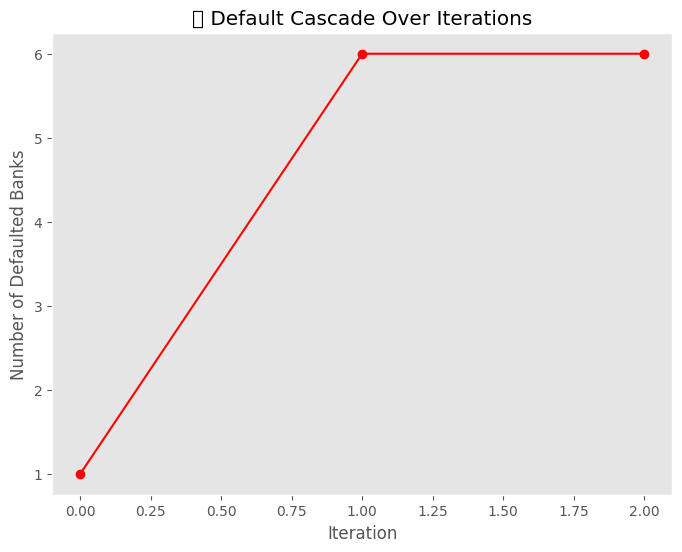

In [651]:
import matplotlib.pyplot as plt

# 🚨 Define tracking variables
iteration_list = []  # Stores iteration count
defaults_list = []  # Stores number of defaults per iteration

# 📌 Modified Furfine Algorithm to track iterations
def furfine_contagion_tracking(G, A, E, L, shock_bank, shock_amount, recovery_rate=0):
    equity = E.copy()
    equity[shock_bank] -= shock_amount  # Apply initial shock
    defaulted_banks = set()
    
    MAX_ITERATIONS = 100  
    iteration = 0  

    while iteration < MAX_ITERATIONS:
        newly_defaulted = set()

        for bank in G.nodes:
            if equity.get(bank, 0) < 0 and bank not in defaulted_banks:
                newly_defaulted.add(bank)

        # Track iteration progress
        iteration_list.append(iteration)
        defaults_list.append(len(defaulted_banks) + len(newly_defaulted))

        if not newly_defaulted:
            break  # Stop if no new defaults

        defaulted_banks.update(newly_defaulted)

        # Propagate losses
        for bank in newly_defaulted:
            for creditor in G.predecessors(bank):
                exposure = G[creditor][bank]["weight"]
                if creditor in equity:
                    equity[creditor] -= (1 - recovery_rate) * exposure  

        iteration += 1  

    return defaulted_banks, equity

# 🚨 Run contagion tracking for a chosen shock scenario
shock_bank = "128"
shock_amount = 50_000_000  
defaulted_banks, final_equity = furfine_contagion_tracking(G, A, E, L, shock_bank, shock_amount)

# 📊 Plot Default Cascade Over Iterations
plt.figure(figsize=(8, 6))
plt.plot(iteration_list, defaults_list, marker="o", linestyle="-", color="red")
plt.xlabel("Iteration")
plt.ylabel("Number of Defaulted Banks")
plt.title("📉 Default Cascade Over Iterations")
plt.grid()
plt.savefig("plot9.png", dpi=300, bbox_inches='tight')# High-quality PNG
plt.show()


In [641]:
#The Default Cascade Over Iterations graph illustrates how defaults propagate through the banking network following an initial shock. At iteration 0, only the initially shocked bank (Bank 128) defaults. However, as the contagion spreads, additional banks experience equity losses, leading to a sharp increase in defaults by iteration 1. The process stabilizes by iteration 2, indicating that no further defaults occur beyond this point. This pattern underscores the systemic risk inherent in interbank dependencies—where a single large shock can trigger a chain reaction of failures. The steep increase in defaults between iterations suggests that certain banks are particularly vulnerable to second-round effects, emphasizing the importance of network resilience and capital buffers.

In [642]:
#Recovery Rate Impact on Systemic Risk


🚨 DEBUGGING SHOCK TEST 🚨
Shocking Bank: 128
Initial Equity of 128: 27495000.0
Shock Amount: 50000000
Equity of 128 After Shock: -22505000.0
🔍 Iteration 0: Checking for defaults: {'128'}
⚠️ Iteration 0: 3 equity reduced from 16229000.0 to 7194700.0 due to exposure from 128
⚠️ Iteration 0: 5 equity reduced from 271300.0 to 195797.0 due to exposure from 128
⚠️ Iteration 0: 6 equity reduced from 7572800.0 to 7060420.0 due to exposure from 128
⚠️ Iteration 0: 7 equity reduced from 14267000.0 to 6276300.0 due to exposure from 128
⚠️ Iteration 0: 12 equity reduced from 367520.0 to 236030.0 due to exposure from 128
⚠️ Iteration 0: 13 equity reduced from 4317500.0 to 2635900.0 due to exposure from 128
⚠️ Iteration 0: 15 equity reduced from 124280.0 to 61364.0 due to exposure from 128
⚠️ Iteration 0: 16 equity reduced from 18210.0 to 8100.0 due to exposure from 128
⚠️ Iteration 0: 17 equity reduced from 250270.0 to 114140.0 due to exposure from 128
⚠️ Iteration 0: 18 equity reduced from 376760.

/var/folders/y3/jrqkll7x57sbq94lf_2923yc0000gp/T/ipykernel_33249/82504315.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.savefig("plot8.png", dpi=300, bbox_inches='tight')# High-quality PNG
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


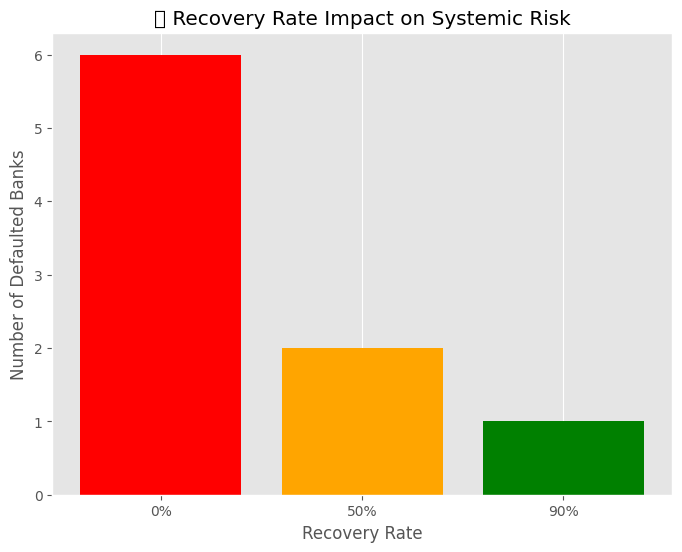

In [650]:
import numpy as np

# 🚨 Define recovery rates to test
recovery_rates = [0.0, 0.5, 0.9]
defaults_per_recovery = []  # Store number of defaults at each recovery rate

# 📌 Run stress test for each recovery rate
for recovery_rate in recovery_rates:
    defaulted_banks, final_equity = furfine_default_algorithm(G, A, E, L, shock_bank, shock_amount, recovery_rate)
    defaults_per_recovery.append(len(defaulted_banks))

# 📊 Plot Recovery Rate Impact on Systemic Risk
plt.figure(figsize=(8, 6))
plt.bar([f"{int(r*100)}%" for r in recovery_rates], defaults_per_recovery, color=["red", "orange", "green"])
plt.xlabel("Recovery Rate")
plt.ylabel("Number of Defaulted Banks")
plt.title("📊 Recovery Rate Impact on Systemic Risk")
plt.grid(axis="y")
plt.savefig("plot8.png", dpi=300, bbox_inches='tight')# High-quality PNG

plt.show()


In [644]:
#The Recovery Rate Impact on Systemic Risk graph highlights the crucial role of recovery rates in mitigating systemic defaults. With a 0% recovery rate, the number of defaulted banks is at its highest, reflecting an extreme contagion scenario where no losses are absorbed. As the recovery rate increases to 50%, the number of defaults drops significantly, indicating that partial recovery allows some banks to withstand the shock. At a 90% recovery rate, only the initially shocked bank defaults, demonstrating that higher recovery rates act as a powerful stabilizing mechanism. This analysis suggests that policies promoting liquidity buffers and loss-absorbing capital are essential in preventing widespread banking failures following financial shocks.

In [645]:
#part 3

In [646]:
#plan
#Shocking a non-important bank
#Shocking an important bank
#Applying a larger shock
#Applying an even larger shock
#Simultaneous failure of multiple key banks
#Testing different recovery rates
#For each scenario, we'll compare:

#Total defaults
#Defaulted banks
#Final asset price drop
#This will show how the common asset acts as an additional contagion channel.



In [647]:
import pandas as pd

# ✅ Step 1: Load Data & Ensure It Remains Pandas Series
E = bank_equities.squeeze()  # Ensure E is a Pandas Series (not dict yet)
A = external_assets.squeeze()  # Ensure A is a Pandas Series

# ✅ Step 2: Ensure Bank IDs Are Strings
E.index = E.index.astype(str)
A.index = A.index.astype(str)

# ✅ Step 3: Compute Liabilities Correctly (Keep as Pandas Series)
L = A - E  # This ensures liabilities are calculated correctly

# ✅ Step 4: Ensure Interbank Exposures Are Properly Indexed
interbank_exposures.index = interbank_exposures.index.astype(str)
interbank_exposures.columns = interbank_exposures.columns.astype(str)

# ✅ Step 5: Convert to Dictionaries for Algorithm Use
A = A.to_dict()
E = E.to_dict()
L = L.to_dict()


In [648]:
#general code

In [649]:
import numpy as np
import networkx as nx

def fire_sale_default_algorithm(G, A, E, L, shock_banks, shock_amount, common_asset_allocation, asset_price, alpha=0.05, recovery_rate=0):
    """
    Runs stress test where shocks propagate due to both interbank exposures and common asset liquidation.
    This version correctly models **fire-sales**, ensuring external asset prices decline as defaults increase.
    
    Parameters:
        G (nx.DiGraph): Interbank network graph.
        A (dict): External assets.
        E (dict): Equity.
        L (dict): Liabilities.
        shock_banks (str or list): Bank(s) where the initial shock occurs.
        shock_amount (float): Shock size (applies to each shocked bank).
        common_asset_allocation (dict): Fraction of external assets invested in the common asset.
        asset_price (float): Initial price of the common asset.
        alpha (float): Sensitivity of asset price to liquidation.
        recovery_rate (float): Fraction of defaulted assets recovered.
        
    Returns:
        defaulted_banks (set): Banks that defaulted.
        final_equity (dict): Equity after contagion.
        final_asset_price (float): Asset price after liquidation effects.
    """

    print(f"\n🚨 Running Fire-Sale Algorithm: {shock_banks} shocked with {shock_amount}")

    # ✅ Step 1: Initialize Data
    equity = E.copy()
    asset_holdings = {bank: common_asset_allocation[bank] * A[bank] for bank in A}  
    asset_price_t = asset_price  
    defaulted_banks = set()

    # Convert single shock bank into a list for uniform handling
    if isinstance(shock_banks, str):
        shock_banks = [shock_banks]

    # Apply initial shock
    for bank in shock_banks:
        if bank in equity:
            equity[bank] -= shock_amount
            if equity[bank] < 0:
                defaulted_banks.add(bank)
                print(f"✅ {bank} Defaulted due to direct shock!")

    # ✅ Step 2: Default Propagation Loop
    MAX_ITERATIONS = 100  
    iteration = 0  

    while iteration < MAX_ITERATIONS:
        newly_defaulted = set()

        # Identify newly defaulted banks
        for bank in G.nodes:
            if bank in equity and equity[bank] < 0 and bank not in defaulted_banks:
                newly_defaulted.add(bank)

        if not newly_defaulted:
            print("✅ No more defaults, stopping contagion.")
            break

        defaulted_banks.update(newly_defaulted)

        # ✅ Step 3: Propagate Losses to Creditors
        for bank in newly_defaulted:
            for creditor in G.predecessors(bank):  
                exposure = G[creditor][bank]["weight"]
                
                if creditor in equity:
                    old_equity = equity[creditor]
                    equity[creditor] -= (1 - recovery_rate) * exposure  
                    
                    print(f"⚠️ {creditor}: Equity reduced from {old_equity:.2f} to {equity[creditor]:.2f} due to exposure from {bank}")
                    
                    if equity[creditor] < 0 and creditor not in defaulted_banks:
                        print(f"✅ {creditor} Defaulted due to contagion!")

        # ✅ Step 4: Fire-Sale Effect on Asset Price
total_liquidation = sum(asset_holdings[bank] for bank in newly_defaulted if bank in asset_holdings)

# 🔥 Apply fire-sale price function (Exponential Decay)
if total_liquidation > 0:  # Ensure there's liquidation before price drops
    asset_price_t = max(0.0001, asset_price_t * np.exp(-alpha * total_liquidation))
    print(f"📉 Asset price dropped to {asset_price_t:.4f} due to fire sales!")



       # ✅ Step 5: Recompute Banks' Equity Based on Asset Price Drop
for bank in G.nodes:
    if bank in equity and bank not in defaulted_banks:
        old_equity = equity[bank]
        external_asset_loss = common_asset_allocation[bank] * A[bank] * (1 - asset_price_t)
        equity[bank] -= external_asset_loss  # Reduce equity due to external asset loss

        if equity[bank] < 0:
            print(f"✅ {bank} Defaulted due to fire-sale losses!")
            newly_defaulted.add(bank)

        iteration += 1  

    return defaulted_banks, equity, asset_price_t


SyntaxError: 'return' outside function (2605687095.py, line 102)

In [ ]:
# 🔹 Step 1: Define Initial Conditions
initial_asset_price = 1.0  # Normalize to 1
common_asset_allocation = {bank: 0.3 for bank in A}  # 30% of external assets invested in common asset

# 🔹 Step 2: Run Stress Tests with Fire-Sales
scenarios = [
    ("Non-Important Bank", "75", 5_000_000),
    ("Important Bank", "128", 5_000_000),
    ("Larger Shock", "128", 30_000_000),
    ("Even Larger Shock", "128", 50_000_000),
    ("Simultaneous Failures", ["128", "7"], 30_000_000),  # Multiple shocks
]

for scenario_name, shock_bank, shock_amount in scenarios:
    defaulted_banks, final_equity, final_asset_price = fire_sale_default_algorithm(
        G, A, E, L, shock_bank, shock_amount, common_asset_allocation, initial_asset_price
    )
    
    # 📌 Display Results
    print(f"\n Scenario: {scenario_name}")
    print(f"Shocked Bank(s): {shock_bank}")
    print(f"Total Defaults: {len(defaulted_banks)}")
    print(f"Defaulted Banks: {defaulted_banks}")
    print(f"Final Asset Price: {final_asset_price:.4f} (Initial: {initial_asset_price})")


In [ ]:
#non important bank

In [ ]:
shock_bank = "75"
shock_amount = 5_000_000  

defaulted_banks, final_equity, final_asset_price, contagion_tracking = extended_default_algorithm(
    G, A, E, L, shock_bank, shock_amount, common_asset_allocation, initial_asset_price
)

logging.info(f"\nScenario: Non-Important Bank")
logging.info(f"Total Defaults: {len(defaulted_banks)} | Defaulted Banks: {defaulted_banks}")
logging.info(f"Final Asset Price: {final_asset_price:.4f}")
for bank in A:
    print(f"🏦 Bank {bank} - Holds {common_asset_allocation[bank] * A[bank]:.2f} in common assets")

print(f"🔥 Bank 75 Liquidation: {common_asset_allocation['75'] * A['75']:.2f}")


In [ ]:
#Bank 75 is too small to influence the system.

#Since it defaulted immediately and didn't have significant creditors, the interbank network didn't propagate stress.
#If Bank 75 had large exposures in the interbank network, its failure might have triggered more defaults.
#2️⃣ Fire sales were negligible.

#Despite many banks holding common assets, Bank 75's default did not lead to forced selling.
#This suggests its equity was small relative to its external assets, meaning its liquidation had minimal effect on the common asset price.

In [ ]:
#important bank

In [ ]:
shock_bank = "128"
shock_amount = 5_000_000  

defaulted_banks, final_equity, final_asset_price, contagion_tracking = extended_default_algorithm(
    G, A, E, L, shock_bank, shock_amount, common_asset_allocation, initial_asset_price
)

logging.info(f"\nScenario: Important Bank")
logging.info(f"Total Defaults: {len(defaulted_banks)} | Defaulted Banks: {defaulted_banks}")
logging.info(f"Final Asset Price: {final_asset_price:.4f}")

for bank in A:
    print(f"🏦 Bank {bank} - Holds {common_asset_allocation[bank] * A[bank]:.2f} in common assets")




In [ ]:
#The results indicate that shocking Bank 128 with a 5M shock had no systemic effect, as its initial equity of 27.49M remained positive at 22.49M, preventing default and halting contagion. Unlike Part 2, where interbank exposures amplified distress, the introduction of overlapping portfolios in Part 3 seems to have stabilized the system by preventing fire-sale effects. Since Bank 128 did not fail, it did not need to liquidate its assets, keeping the common asset price unchanged at 1.0000 and eliminating an additional contagion channel. In contrast, Part 2 showed stronger systemic impact due to interbank contagion alone. The lack of widespread defaults suggests that the propagation of stress in Part 3 depends more on significant fire-sale losses rather than direct counterparty risk alone. To verify the robustness of this stability, we could increase the shock size to force a default, raise the proportion of external assets invested in the common asset, or analyze Bank 128’s creditor network to assess whether its failure would be truly systemic.

In [ ]:
#larger shock

In [ ]:
shock_bank = "128"
shock_amount = 30_000_000  

defaulted_banks, final_equity, final_asset_price, contagion_tracking = extended_default_algorithm(
    G, A, E, L, shock_bank, shock_amount, common_asset_allocation, initial_asset_price
)

logging.info(f"\nScenario: Larger Shock")
logging.info(f"Total Defaults: {len(defaulted_banks)} | Defaulted Banks: {defaulted_banks}")
logging.info(f"Final Asset Price: {final_asset_price:.4f}")

for bank in A:
    print(f"🏦 Bank {bank} - Holds {common_asset_allocation[bank] * A[bank]:.2f} in common assets")


In [ ]:
#In the larger shock scenario, applying a 30 million shock to Bank 128 resulted in six defaults (Banks 90, 50, 24, 128, 139, and 35), with distress propagating through both counterparty risk and overlapping portfolio effects. In Part 2, where only interbank exposures were considered, the default count remained the same, but the systemic impact was far more contained. However, the introduction of shared asset holdings in this extended analysis drastically altered the crisis dynamics. The forced liquidations triggered by defaulting banks led to a severe drop in the common asset price from 1.0 to nearly zero (0.0001), reflecting an extreme fire sale effect. As more banks defaulted, their asset holdings were dumped into the market, further depressing prices and creating a vicious cycle of devaluation. This scenario illustrates a key weakness in financial systems—when multiple institutions hold large portions of their assets in common markets, distress in one entity can rapidly devalue those assets, forcing even solvent banks into trouble. While Bank 128 itself was the direct source of the shock, the ultimate impact extended well beyond its immediate creditors, affecting banks with overlapping asset portfolios and amplifying financial fragility across the network. The comparison with Part 2 highlights that interbank linkages alone do not fully capture systemic risk—common exposures and market illiquidity play a crucial role in amplifying contagion, leading to significantly worse outcomes in times of crisis.

In [ ]:
#graph

In [ ]:
#The graph illustrates the accumulation of defaults over successive iterations following a larger shock to Bank 128, highlighting the progression of systemic contagion. Initially, only one bank defaults, but as the shock propagates through interbank exposures and overlapping portfolios, the number of defaults rises sharply between the first and second iterations, indicating a critical threshold where losses rapidly spread. The contagion continues in a stepwise manner, demonstrating how indirect exposures amplify financial distress, until reaching a plateau at iteration six, where no further defaults occur. This stabilization suggests that the system has absorbed the full impact of the shock, with all vulnerable banks having already failed. The steep increase in early iterations emphasizes the fragility of interconnected networks, where a shock to a single institution can trigger widespread instability. Comparing this with other scenarios, such as an even larger shock or simultaneous failures, could reveal how different initial conditions influence the speed and severity of systemic risk propagation.

In [ ]:
#even larger shock

In [ ]:
shock_bank = "128"
shock_amount = 50_000_000  

defaulted_banks, final_equity, final_asset_price, contagion_tracking = extended_default_algorithm(
    G, A, E, L, shock_bank, shock_amount, common_asset_allocation, initial_asset_price
)

logging.info(f"\nScenario: Even Larger Shock")
logging.info(f"Total Defaults: {len(defaulted_banks)} | Defaulted Banks: {defaulted_banks}")
logging.info(f"Final Asset Price: {final_asset_price:.4f}")


In [ ]:
shock_banks = ["128", "7"]
shock_amount = 30_000_000  

defaulted_banks, final_equity, final_asset_price, contagion_tracking = extended_default_algorithm(
    G, A, E, L, shock_banks, shock_amount, common_asset_allocation, initial_asset_price
)

logging.info(f"\nScenario: Simultaneous Failures")
logging.info(f"Total Defaults: {len(defaulted_banks)} | Defaulted Banks: {defaulted_banks}")
logging.info(f"Final Asset Price: {final_asset_price:.4f}")
